#### Introduction to Statistical Learning, Exercise 2.3

__Please do yourself a favour and only look at the solutions after you honestly tried to solve the exercises.__

# Explore the Boston Housing Data Set

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from islpy import datasets
%matplotlib inline

### A. Learn About the Data Set

Read the documentation of the `Boston` data set. Then load it into a variable called `boston` and look at a few rows.

How many rows (observations) and columns (variables) are in the data set? What do the rows and columns represent? (You do not need to describe every variable in detail).

In [4]:
help(datasets.Boston)

Help on function Boston in module islpy.datasets:

Boston(use_cache=False)
    Return data frame for Boston dataset.
    
        Description:
        
             Housing values and other information about Boston suburbs.
        
        Format:
        
             This data frame contains the following columns:
        
             ‘crim’ per capita crime rate by town.
        
             ‘zn’ proportion of residential land zoned for lots over 25,000
                  sq.ft.
        
             ‘indus’ proportion of non-retail business acres per town.
        
             ‘chas’ Charles River dummy variable (= 1 if tract bounds river; 0
                  otherwise).
        
             ‘nox’ nitrogen oxides concentration (parts per 10 million).
        
             ‘rm’ average number of rooms per dwelling.
        
             ‘age’ proportion of owner-occupied units built prior to 1940.
        
             ‘dis’ weighted mean of distances to five Boston employment
 

In [6]:
boston = datasets.Boston()
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
boston.shape

(506, 14)

There are 506 rows and 14 columns in the data set. Each row corresponds to a different Boston suburb. The columns describe various properties of a suburb, such as crime rate and air quality.

### B. A Quick Look at the Data Set

Make some pairwise scatter plots of variables in the data set. Describe your findings.

With fourteen columns in the data set, the full scatter plot matrix will not be very readable. We chose a few variables that might be interesting.

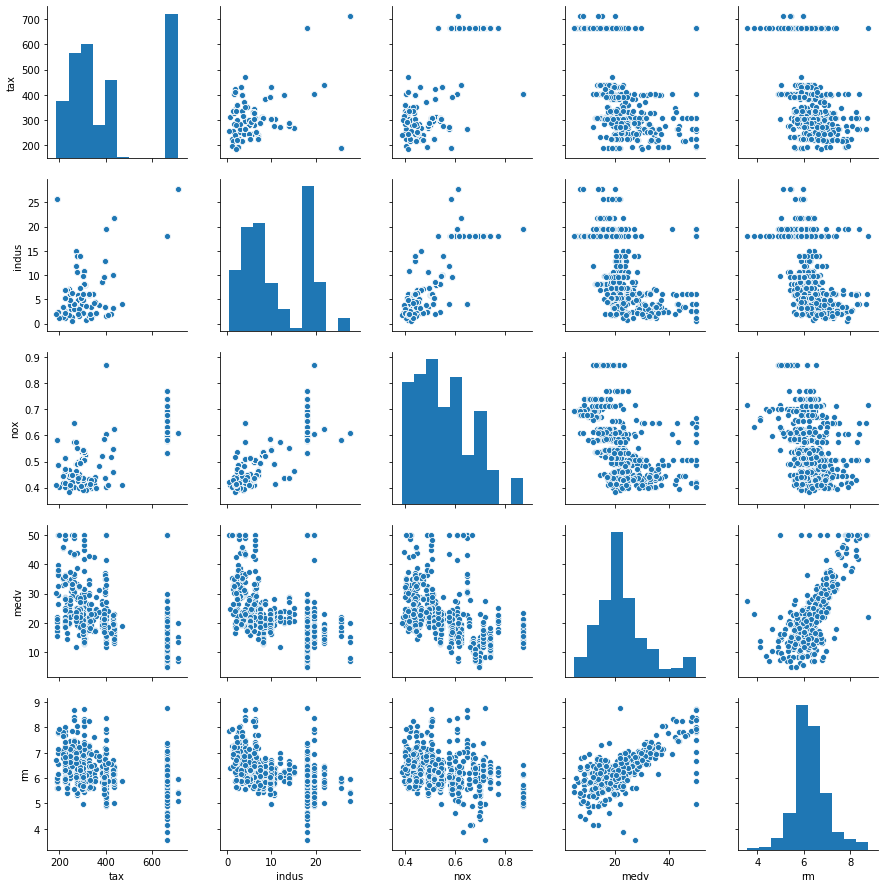

In [25]:
sel = boston[['tax', 'indus', 'nox', 'medv', 'rm']]
sns.pairplot(data=sel)
plt.show()

We can see some expected correlations: property value (`medv`) is strongly correlated with the number of rooms (`rm`) and air quality (`nox`) depends on the presence of industrial installations (`indus`). It looks like `medv` goes down with `indus` (and therefore `nox`), which is somewhat expected. Other scatter plots have more complicated structures that are harder to interpret. 

### C. Crime Rate

Are there any predictors associated with the per capita crime rate (`crim`)? If so, explain the nature of the relationship. 

We suspect that the crime rate might be related to `medv`, `ptratio`, `lstat` and `dis`:

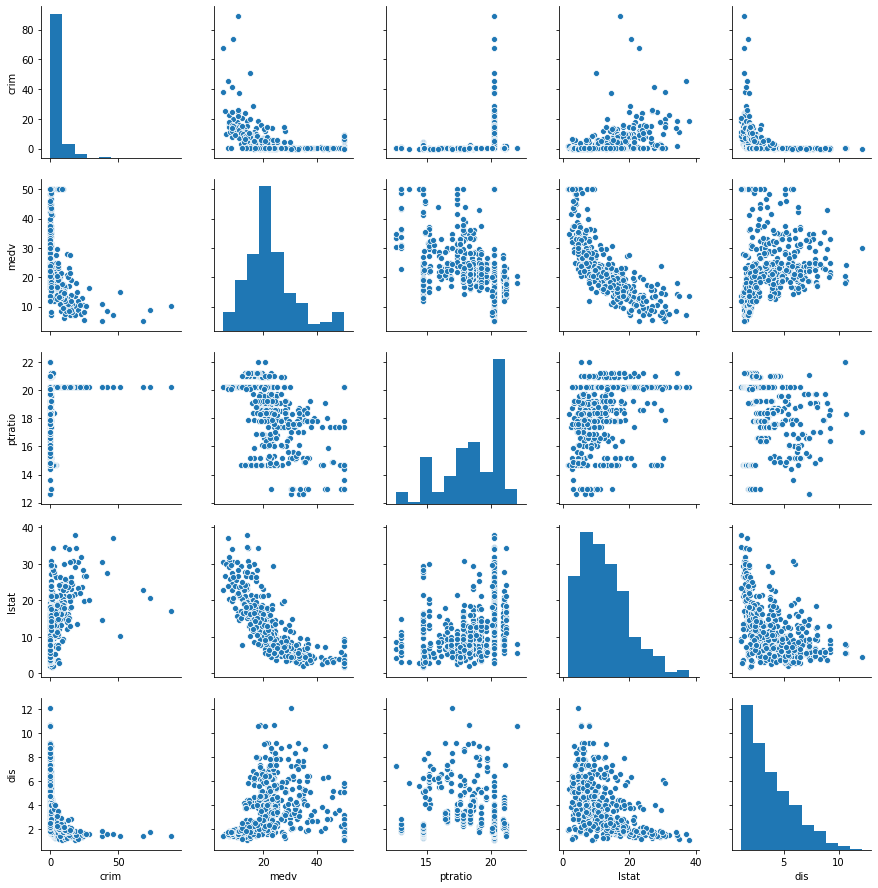

In [26]:
sel = boston[['crim', 'medv', 'ptratio', 'lstat', 'dis']]
sns.pairplot(data=sel)
plt.show()

The crime rate seems indeed related to `medv`, `lstat` and `dis`. Higher property values are correlated with lower crime rates. The highest crime rates occur in suburbs with lowest weighted distance to job centres. Lower social status also seems to correlate with higher crime rates.

### D. Extreme Values & Ranges

Do any suburbs have exceptionally high crime rates? Tax rates? Pupil-teacher ratios? Use the `describe()` and `nlargest()` methods to find out.

In [28]:
sel = boston[['crim', 'tax', 'ptratio']]
sel.describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677082,666.000000,20.200000
max,88.976200,711.000000,22.000000


In [40]:
sel.nlargest(20, 'crim')

,crim,tax,ptratio
380,88.9762,666,20.2
418,73.5341,666,20.2
405,67.9208,666,20.2
410,51.1358,666,20.2
414,45.7461,666,20.2
404,41.5292,666,20.2
398,38.3518,666,20.2
427,37.6619,666,20.2
413,28.6558,666,20.2
417,25.9406,666,20.2


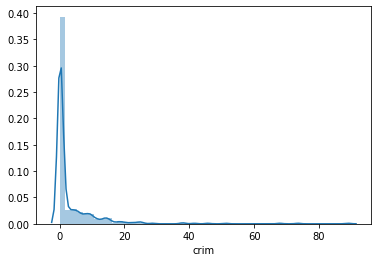

In [42]:
sns.distplot(sel['crim'])
plt.show()

There is quite a large number of suburbs that are far above the mean of 3.6. This can be seen from the numbers and the long tail in the distribution plot above.

In [50]:
sel[sel.tax > 600]

,crim,tax,ptratio
356,8.98296,666,20.2
357,3.84970,666,20.2
358,5.20177,666,20.2
359,4.26131,666,20.2
360,4.54192,666,20.2
...,...,...,...
488,0.15086,711,20.1
489,0.18337,711,20.1
490,0.20746,711,20.1
491,0.10574,711,20.1


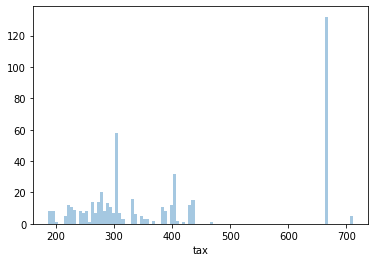

In [49]:
sns.distplot(sel['tax'], kde=False, bins=100)
plt.show()

There are 137 suburbs with exceptionally high tax rates above 600.

In [45]:
sel.nsmallest(20, 'ptratio')

,crim,tax,ptratio
196,0.04011,329,12.6
197,0.04666,329,12.6
198,0.03768,329,12.6
257,0.61154,264,13.0
258,0.66351,264,13.0
259,0.65665,264,13.0
260,0.54011,264,13.0
261,0.53412,264,13.0
262,0.52014,264,13.0
263,0.82526,264,13.0


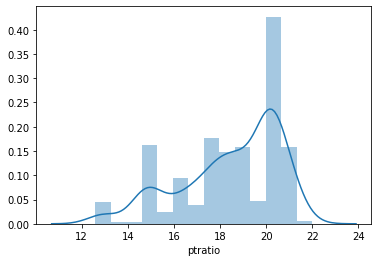

In [44]:
sns.distplot(sel['ptratio'])
plt.show()

There are some very low values of pupil-teacher ratio. The distribution shows a tail on the left.

### E. Counting

How many suburbs in the data set bound the Charles river? 

In [56]:
boston['chas'].sum()

35

There are 35 suburbs bounding the Charles river.

### F. Pupil-teacher Ratio Median

What is the median of the pupil-teacher ratio among the suburbs in the data set?

In [57]:
boston['ptratio'].median()

19.05

The median of the pupil-teacher ratio (`ptratio`) is 19.05.

### G. Single Suburb Properties

What is the suburb with the lowest median value (`medv`) of ownership occupied homes? What are the values of some of the other predictors for this suburb and how do they compare to the overall distributions? Use the `idxmin()` method to find the row with the lowest value of `medv`. 